# Import Modules

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import os, sys
import numpy as np

%matplotlib inline
from matplotlib import pyplot as plt

# Set Contants

In [ ]:
NUM_CLASS = 10
WIDTH, HEIGHT = 32, 32
CHANNEL = 3

MODEL_NAME = 'Basic_CNN'
LEARNING_RATE = 1e-3
BATCH_SIZE = 512
EPOCHS = 300

EXPERIMENT_DATA = {
    'name' : MODEL_NAME,
    'number' : '1',
    'date' : '05-24-2021',
    'description' : 'This is experiment that categorize images using CIFAR10 data\n\n' +
        'HyperParameter\n' +
        f'LR: {LEARNING_RATE}\n' +
        f'Batch: {BATCH_SIZE}\n' +
        f'Epochs: {EPOCHS}\n'
}

ROOT_DIR = os.path.join('/content', 'drive','MyDrive' ) # Write your working directory
RESULT_DIR = os.path.join( ROOT_DIR, 'Results' )
MODEL_DIR = os.path.join( RESULT_DIR, MODEL_NAME )

# Load and Preprocess Data

In [ ]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.cifar10.load_data()
X_train, X_test = X_train.astype( 'float32' ) / 255., X_test.astype( 'float32' ) / 255.
Y_train, Y_test = keras.utils.to_categorical( Y_train, NUM_CLASS ), keras.utils.to_categorical( Y_test, NUM_CLASS )

In [ ]:
print( X_train.shape, X_test.shape )
print( Y_test.shape, Y_test.shape )

(50000, 32, 32, 3) (10000, 32, 32, 3)
(10000, 10) (10000, 10)


# Construct Model

In [ ]:
INPUT_SHAPE = ( -1, X_train.shape)

In [ ]:
input = layers.Input( ( HEIGHT, WIDTH, CHANNEL ), name = 'input'  )

x = layers.Conv2D( 32, kernel_size = ( 3, 3 ), padding = 'same', activation='relu' )( input )
x = layers.MaxPool2D( pool_size = ( 3, 3 ), strides = ( 2, 2 ), padding = 'same' )( x )
x = layers.Dropout( 0.3 )( x )

x = layers.Conv2D( 64, kernel_size = ( 3, 3 ), padding = 'same', activation='relu' )( x )
x = layers.MaxPool2D( pool_size = ( 3, 3 ), strides = ( 2, 2 ), padding = 'same' )( x )
x = layers.Dropout( 0.3 )( x )

x = layers.Conv2D( 128, kernel_size = ( 3, 3 ), padding = 'same', activation='relu' )( x )
x = layers.MaxPool2D( pool_size = ( 3, 3 ), strides = ( 2, 2 ), padding = 'same' )( x )
x = layers.Dropout( 0.3 )( x )

x = layers.Conv2D( 256, kernel_size = ( 3, 3 ), padding = 'same', activation='relu' )( x )
x = layers.MaxPool2D( pool_size = ( 3, 3 ), strides = ( 2, 2 ), padding = 'same' )( x )
x = layers.Dropout( 0.3 )( x )

x = layers.Conv2D( 512, kernel_size = ( 3, 3 ), padding = 'same', activation='relu' )( x )
x = layers.MaxPool2D( pool_size = ( 3, 3 ), strides = ( 2, 2 ), padding = 'same' )( x )
x = layers.Dropout( 0.3 )( x )

feature_map_shape = x.shape
flatten_size = feature_map_shape[1] * feature_map_shape[2] * feature_map_shape[3]

x = layers.Flatten( )( x )

x = layers.Dense( flatten_size, activation = 'relu' )( x )
x = layers.Dropout( 0.5 )( x )

x = layers.Dense( flatten_size, activation = 'relu' )( x )
x = layers.Dropout( 0.5 )( x )

output = layers.Dense( NUM_CLASS, activation='softmax' )( x )

In [ ]:
basic_cnn_model = keras.Model( input, output, name = MODEL_NAME )
basic_cnn_model.summary( )

Model: "Basic_CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 64)          0 

# Train Model

In [ ]:
basic_cnn_model.compile( optimizer = keras.optimizers.Adam( LEARNING_RATE ), loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )

In [ ]:
history = basic_cnn_model.fit( X_train, Y_train, batch_size = BATCH_SIZE, epochs = EPOCHS, validation_split = 0.2, verbose = 0 )

# Test Model

In [ ]:
os.chdir( RESULT_DIR )

new_result_dir = f"{EXPERIMENT_DATA['name']}_{EXPERIMENT_DATA['number']}_{EXPERIMENT_DATA['date']}"
if ( new_result_dir not in os.listdir( ) ):
    os.mkdir( new_result_dir )
os.chdir( new_result_dir )

with open( 'Description.txt', 'w' ) as f:
    f.write( EXPERIMENT_DATA['description'] + '\n' )

In [ ]:
evaluation = basic_cnn_model.evaluate( X_test, Y_test )
print( f'loss: {evaluation[0]:.2f}, acc: {evaluation[1]*100:.2f}%' )
with open( 'Description.txt', 'a' ) as f:
    f.write( f'loss: {evaluation[0]:.2f}, acc: {evaluation[1]*100:.2f}%' )

313/313 [==============================] - 2s 6ms/step - loss: 0.7135 - accuracy: 0.7837
loss: 0.71, acc: 78.37%


In [ ]:
stdout = sys.stdout
with open( 'Model_Info.txt', 'w' ) as f:
    sys.stdout = f
    basic_cnn_model.summary()
sys.stdout = stdout

In [ ]:
basic_cnn_model.save( MODEL_NAME + '.h5')

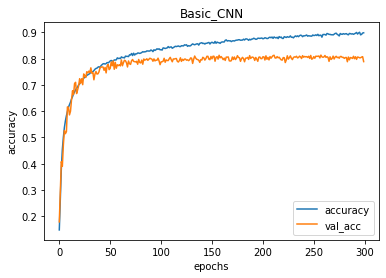

In [ ]:
plt.plot( history.history['accuracy'] )
plt.plot( history.history['val_accuracy'])
plt.xlabel( 'epochs' )
plt.ylabel( 'accuracy' )
plt.legend( ['accuracy', 'val_acc'] )
plt.title( MODEL_NAME )

plt.savefig( 'Result.png' )
plt.show()